# Introduction to xcube's "zenodo" data store


This notebook shows an example how to access a TIF and a NetCDF published on the [https://zenodo.org](https://zenodo.org) webpage. 

Furthermore it contains an example of how to preload a Zarr file published in compressed tar format on the https://zenodo.org webpage. The compressed files will be downloaded, unpacked and the the Zarr files will be made available, which can be subsequently used by the data store as usual.

For more examples, e.g. how to preload a zip or a nested zip file, please head over to the examples located in the xcube-zenodo GitHub repository https://github.com/xcube-dev/xcube-zenodo/tree/main/examples

Please, also refer to the [DeepESDL documentation](https://earthsystemdatalab.net/guide/jupyterlab) and visit the platform's [website](https://www.earthsystemdatalab.net/) for further information!

Brockmann Consult, 2025

-----------------

**This notebook runs with the python environment `deepesdl-xcube-1.9.1`, please checkout the documentation for [help on changing the environment](https://earthsystemdatalab.net/guide/jupyterlab/#python-environment-selection-of-the-jupyter-kernel).**

In [1]:
# mandatory imports
from xcube.core.store import new_data_store
from xcube.core.store import get_data_store_params_schema

First, we get the store parameters needed to initialize a zenodo [data store](https://xcube.readthedocs.io/en/latest/dataaccess.html#data-store-framework). 

In [2]:
store_params = get_data_store_params_schema("zenodo")
store_params

---
# Example of lazy access of a tif file 

We initiate a zenodo [data store](https://xcube.readthedocs.io/en/latest/dataaccess.html#data-store-framework). Note that the `xcube-zenodo` plugin is recognized after installation by setting the first argument to `"zenodo"` in the `new_data_store` function. To specify the data source, we set the `root` parameter to the record ID, which can be found in the URL of the corresponding Zenodo publication page. Let's have a look at the data published with the title "Canopy height and biomass map for Europe": https://zenodo.org/records/8154445 with the record ID `root="8154445"`.

In [3]:
%%time
store = new_data_store("zenodo", root="8154445")

CPU times: user 5.45 ms, sys: 140 μs, total: 5.59 ms
Wall time: 5.47 ms


The data IDs can be streamed by executing the following cell, which are equal to the filenames in the file section.

In [4]:
%%time
store.list_data_ids()

CPU times: user 12.6 ms, sys: 8.07 ms, total: 20.6 ms
Wall time: 478 ms


['planet_canopy_cover_30m_v0.1.tif',
 'planet_agb_30m_v0.1.tif',
 'planet_canopy_height_30m_v0.1.tif']

We can describe the dataset using the `describe_data` method, as shown below.  

In [5]:
store.describe_data("planet_canopy_cover_30m_v0.1.tif")

Next we can open the data. We can first view the available opening parameters, which can be added to the `open_data` method in the subsequent cell. 

In [7]:
%%time
open_params = store.get_open_data_params_schema(data_id="planet_canopy_cover_30m_v0.1.tif")
open_params

CPU times: user 177 μs, sys: 64 μs, total: 241 μs
Wall time: 245 μs


In [8]:
%%time
ds = store.open_data(
    "planet_canopy_cover_30m_v0.1.tif",
    tile_size=(1024, 1024),
)
ds

CPU times: user 45.3 ms, sys: 8.33 ms, total: 53.7 ms
Wall time: 52.3 ms


<xarray.Dataset> Size: 25GB
Dimensions:      (x: 170397, y: 149363)
Coordinates:
  * x            (x) float64 1MB 2.555e+06 2.555e+06 ... 7.667e+06 7.667e+06
  * y            (y) float64 1MB 5.82e+06 5.82e+06 ... 1.339e+06 1.339e+06
    spatial_ref  int64 8B 0
Data variables:
    band_1       (y, x) uint8 25GB dask.array<chunksize=(1024, 1024), meta=np.ndarray>
Attributes:
    source:   https://zenodo.org/records/8154445/files/planet_canopy_cover_30...

We plot parts of the opened data as an example below. The data shows the canopy cover fraction within a range of [0, 100]. 

CPU times: user 734 ms, sys: 83.5 ms, total: 818 ms
Wall time: 2.78 s


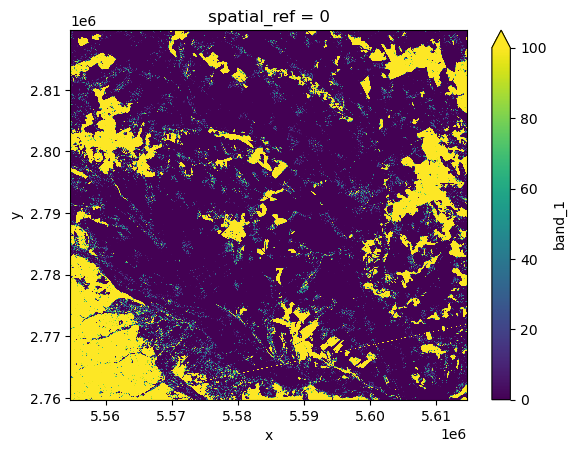

In [9]:
%%time
ds.band_1[100000:102000, 100000:102000].plot(vmin=0, vmax=100)

We can also open a TIFF as a [xcube's multi-resolution  dataset](https://xcube.readthedocs.io/en/latest/mldatasets.html#xcube-multi-resolution-datasets), where we can select the level of resolution. The opened dataset however is not cloud optimized and thus consists of only one level.   

In [10]:
%%time
mlds = store.open_data(
    "planet_canopy_cover_30m_v0.1.tif",
    tile_size=(1024, 1024),
    data_type="mldataset"
)
mlds.num_levels

CPU times: user 15.9 ms, sys: 234 μs, total: 16.2 ms
Wall time: 326 ms


1

In [11]:
%%time
ds = mlds.get_dataset(0)
ds

CPU times: user 56.2 ms, sys: 0 ns, total: 56.2 ms
Wall time: 269 ms


<xarray.Dataset> Size: 25GB
Dimensions:      (x: 170397, y: 149363)
Coordinates:
  * x            (x) float64 1MB 2.555e+06 2.555e+06 ... 7.667e+06 7.667e+06
  * y            (y) float64 1MB 5.82e+06 5.82e+06 ... 1.339e+06 1.339e+06
    spatial_ref  int64 8B 0
Data variables:
    band_1       (y, x) uint8 25GB dask.array<chunksize=(1024, 1024), meta=np.ndarray>
Attributes:
    source:   https://zenodo.org/records/8154445/files/planet_canopy_cover_30...

---
# Example of lazy access of a netcdf file 
We can also use the zenodo data store to open NetCDF files. To do this we need to initiate a new data store with the corresponding record ID. In the below example we use "Atlas of Tides, North West European Shelf, from NEMO tide and surge model.": https://zenodo.org/records/13882297 with the record ID `root="13882297"`.

In [13]:
%%time
store = new_data_store("zenodo", root="13882297")

CPU times: user 4.92 ms, sys: 171 μs, total: 5.09 ms
Wall time: 5.02 ms


We can list all available data IDs again executing the following cell.

In [14]:
%%time
store.list_data_ids()

CPU times: user 21 ms, sys: 647 μs, total: 21.6 ms
Wall time: 543 ms


['gridded_constituents_tideonly.nc',
 'gridded_constituents_ERA5weather.nc',
 'gridded_tidestats_ERA5weather.nc',
 'gridded_tidestats_tideonly.nc']

Next we open a dataset. Note if `chunks` are given, the data set is loaded lazily as a [chunked xr.Dataset](https://xarray.pydata.org/en/v0.10.2/dask.html).

In [15]:
%%time
ds = store.open_data(
    "/gridded_tidestats_ERA5weather.nc",
    chunks={}
)
ds

CPU times: user 73 ms, sys: 29.5 ms, total: 103 ms
Wall time: 6.44 s


<xarray.Dataset> Size: 15MB
Dimensions:  (y: 375, x: 297)
Dimensions without coordinates: y, x
Data variables: (12/17)
    nav_lon  (y, x) float64 891kB dask.array<chunksize=(375, 297), meta=np.ndarray>
    nav_lat  (y, x) float64 891kB dask.array<chunksize=(375, 297), meta=np.ndarray>
    z0       (y, x) float64 891kB dask.array<chunksize=(375, 297), meta=np.ndarray>
    HAT      (y, x) float64 891kB dask.array<chunksize=(375, 297), meta=np.ndarray>
    LAT      (y, x) float64 891kB dask.array<chunksize=(375, 297), meta=np.ndarray>
    MHW      (y, x) float64 891kB dask.array<chunksize=(375, 297), meta=np.ndarray>
    ...       ...
    MHHW     (y, x) float64 891kB dask.array<chunksize=(375, 297), meta=np.ndarray>
    MLLW     (y, x) float64 891kB dask.array<chunksize=(375, 297), meta=np.ndarray>
    RangeAT  (y, x) float64 891kB dask.array<chunksize=(375, 297), meta=np.ndarray>
    MSRange  (y, x) float64 891kB dask.array<chunksize=(375, 297), meta=np.ndarray>
    MRange   (y, x) float64 891kB dask.array<chunksize=(375, 297), meta=np.ndarray>
    MNRange  (y, x) float64 891kB dask.array<chunksize=(375, 297), meta=np.ndarray>
Attributes:
    Author:       Joanne Williams, joll@noc.ac.uk
    Institute:    National Oceanography Centre
    Title:        Tidal constituents for NOCtide from model run
    Modelrun:     ERA5weather
    Modelconfig:  newfriction
    TimeStamp:    11-Jun-2024 13:01:44
    Notes:        Statistics based on ERA5 hindcast run from 1980 to 2022. \n...

We plot the Mean Low Water (MLW) data as an example. 

CPU times: user 37.4 ms, sys: 1.01 ms, total: 38.4 ms
Wall time: 300 ms


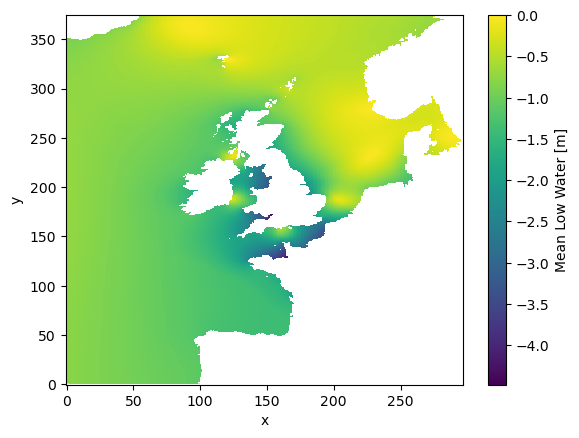

In [16]:
%%time
ds.MLW.plot()

---
# Example of preload access of a zipped zarr file 
We can also use the zenodo data store to access zipped zarr files from zenodo. The compressed files will be downloaded, unpacked and the the Zarr files will be made available, which can be subsequently used by the data store as usual.The data is downloaded into a directory called "zenodo_cache" in you currend working directory.

We initiate a zenodo [data store](https://xcube.readthedocs.io/en/latest/dataaccess.html#data-store-framework) for the "Dheed : a global database of dry and hot extreme events" record https://zenodo.org/records/11546130 with the record ID `root="11546130"`. Note that the `xcube-zenodo` plugin is recognized after installation by setting the first argument to `"zenodo"` in the `new_data_store` function. We can optionally specify the cache data store's ID and parameters using the `cache_store_id` and `cache_store_params` keyword arguments. By default, `cache_store_id` is set to `file`, and `cache_store_params` defaults to `dict(root="zenodo_cache/11546130", max_depth=10)`.

In [17]:
%%time
store = new_data_store("zenodo", root="11546130")

CPU times: user 5.43 ms, sys: 0 ns, total: 5.43 ms
Wall time: 5.32 ms


Compressed files can be preloaded using the `preload_data` method. This approach enables the downloading of compressed files that cannot be lazily loaded, allowing them to be stored and readily available for the duration of the project. Also this method uses `preload_params`, which can be viewed in the next cell.

In [18]:
%%time
preload_params = store.get_preload_data_params()
preload_params

CPU times: user 34 μs, sys: 7 μs, total: 41 μs
Wall time: 42.9 μs


The `preload_data` method returns a store which may be used subsequently to access the preloaded data, as shown in the subsequent cells. If no data IDs are given, all available data in compressed format will be preloaded. Note that the `preload_method` is new and highly experimental.

**Please note: if you see an "Error displaying widget: model not found", don't worry - we are trying to find a solution, but the cell will still execute. Please also note, that the below dataset takes quite some minutes to load.**


In [19]:
cache_store = store.preload_data(
    "EventCube_ranked_pot0.01_ne0.1.zarr.zip",
    "mergedlabels.zarr.zip"
)

The data IDs can be view by listing the data IDs of the cache store, which is returned by the `preload_data` method. The new data ID is identical to the original, except that the `.zip` extension indicating a compressed format has been removed.

In [20]:
cache_store.list_data_ids()

['mergedlabels.zarr', 'EventCube_ranked_pot0.01_ne0.1.zarr']

Next we want to open one of the datasets. We first view the availbale parameters to open the data. 

In [21]:
%%time
open_params = cache_store.get_open_data_params_schema(
    data_id="EventCube_ranked_pot0.01_ne0.1.zarr"
)
open_params

CPU times: user 0 ns, sys: 717 μs, total: 717 μs
Wall time: 721 μs


In [22]:
%%time
ds = cache_store.open_data("EventCube_ranked_pot0.01_ne0.1.zarr")
ds

CPU times: user 8.39 ms, sys: 537 μs, total: 8.93 ms
Wall time: 31.1 ms


<xarray.Dataset> Size: 111GB
Dimensions:    (latitude: 721, longitude: 1440, time: 26663)
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time       (time) datetime64[ns] 213kB 1950-01-01 1950-01-02 ... 2022-12-31
Data variables:
    layer      (latitude, longitude, time) float32 111GB dask.array<chunksize=(6, 120, 5844), meta=np.ndarray>

We plot the opened data at the last time step as an example below.

CPU times: user 2.96 s, sys: 406 ms, total: 3.36 s
Wall time: 1.94 s


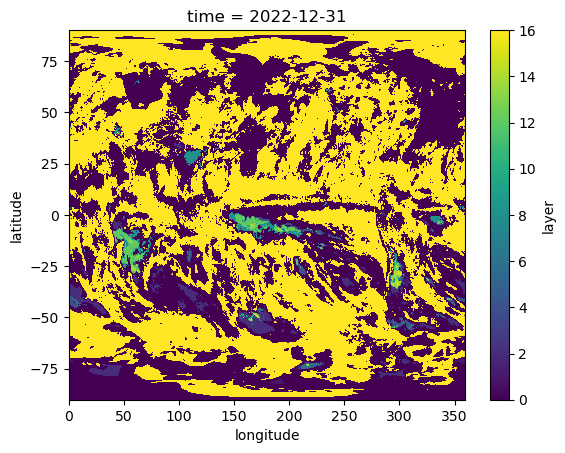

In [23]:
%%time
ds.layer.isel(time=-1).plot()

Some additional notes: 

* The `preload_data` function persists the data and if you don't need it anymore it needs to be activly deleted. 
* The `close()` method only cleans up the download folder in case there were some leftovers due to some network or io issues. But the preloaded datasets remain and need to be deleted by the users manually if they don't need it.

Furthermore, if the user runs the preload job again even when the dataset is available in the cache, it will run the preload job from scratch to avoid considering a half written zarr as a complete preloaded dataset. 